# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.36999999172985554


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

**4.1 DDPG Algorithm**

According to https://towardsdatascience.com/deep-deterministic-policy-gradient-ddpg-theory-and-implementation-747a3010e82f:

Deep Deterministic Policy Gradient (DDPG) is a reinforcement learning technique that combines both Q-learning and Policy gradients. DDPG being an actor-critic technique consists of two models: Actor and Critic. The actor is a policy network that takes the state as input and outputs the exact action (continuous), instead of a probability distribution over actions. The critic is a Q-value network that takes in state and action as input and outputs the Q-value. DDPG is an “off”-policy method. DDPG is used in the continuous action setting and the “deterministic” in DDPG refers to the fact that the actor computes the action directly instead of a probability distribution over actions.
DDPG is used in a continuous action setting and is an improvement over the vanilla actor-critic.

**4.1 Neural Networks architecture**

The Actor and Critic are sharing the same architecture, consist of two fully-connected layers with Batch normalization applied to first hidden layer. ReLu has been used as activation function for hidden layers and Tanh for output. The weights defined from uniform distribution, defining weights from normal distribution and using leaky_relu activation function fo hidden layers prooved to be harmful to NN performance. 

**4.1 Hyperparameters**

UDACITY learning exercise hyperparameters has been used as a starting point. Then hyperparameters were improved empirically.
- fc1_units=256 # Number of nodes in the first hidden layer
- fc2_units=256 # Number of nodes in the second hidden layer
- BUFFER_SIZE = int(1e6) # replay buffer size
- BATCH_SIZE = 256 # minibatch size
- GAMMA = 0.99 # discount factor
- TAU = 1e-3 # for soft update of target parameters
- LR_ACTOR = 1e-3 # learning rate of the actor
- LR_CRITIC = 1e-4 # learning rate of the critic(less than learning rate of the actor)
- WEIGHT_DECAY = 0 # L2 weight decay
- LEARNING_PERIOD = 20 # learning timestep interval
- UPDATE_FACTOR = 10 # number of learning passes
- GRAD_CLIPPING = 1.0 # gradient clipping
- OU_SIGMA = 0.2 # OU noise parameter
- OU_THETA = 0.15 # OU noise parameter
- EPSILON = 1.0 # for epsilon in the noise process (act step)
- EPSILON_DECAY = 1e-6 3 epsilon decay rate
- num_episodes=2000 # maximum number of training episodes
- max_t=1000 # maximum number of timesteps per episode

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):

    def __init__(self, state_size, action_size, seed, fc1_units=256, fc2_units=256):
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.bn = nn.BatchNorm1d(fc1_units)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-0.003, 0.003)

    def forward(self, state):
        #state = self.bn(state)
        x = F.relu(self.bn(self.fc1(state)))
        x = F.relu(self.fc2(x))
        return F.tanh(self.fc3(x))


class Critic(nn.Module):

    def __init__(self, state_size, action_size, seed, fc1_units=256, fc2_units=256):
        
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units + action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.bn = nn.BatchNorm1d(fc1_units)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-0.003, 0.003)

    def forward(self, state, action):
        #state = self.bn(state)
        x = F.relu(self.bn(self.fc1(state)))
        x = torch.cat((x, action), dim=1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [7]:
import numpy as np
import random
import copy
from collections import namedtuple, deque
import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
EPSILON = 1.0           # epsilon noise parameter
EPSILON_DECAY = 1e-6    # decay parameter of epsilon
LEARNING_PERIOD = 20    # learning frequency  
UPDATE_FACTOR   = 10    # how much to learn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    def __init__(self, state_size, action_size, random_seed):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.epsilon = EPSILON

        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        self.noise = OUNoise(action_size, random_seed)

        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)

        self.hard_update(self.actor_target, self.actor_local)
        self.hard_update(self.critic_target, self.critic_local)

    def step(self, states, actions, rewards, next_states, dones, timestep):
        for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            self.memory.add(state, action, reward, next_state, done)

        if len(self.memory) > BATCH_SIZE and timestep % LEARNING_PERIOD == 0:
            for _ in range(UPDATE_FACTOR):
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):

        state = torch.from_numpy(state).float().to(device)

        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()

        if add_noise:
            action += self.epsilon * self.noise.sample()

        return action

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        states, actions, rewards, next_states, dones = experiences

        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)

        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)

        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()

        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)

        self.epsilon -= EPSILON_DECAY
        self.noise.reset()

    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

    def hard_update(self, target, source):
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(param.data)

class OUNoise:

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        self.state = copy.copy(self.mu)

    def sample(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:

    def __init__(self, action_size, buffer_size, batch_size, seed):
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

    def add(self, state, action, reward, next_state, done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        return len(self.memory)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
agent = Agent(state_size=33, action_size=4, random_seed=3)

In [9]:
def ddpg(num_episodes=2000, max_t=1000):
    
    scores_deque = deque(maxlen=100) 
    max_score = -np.Inf 
    running_avg = []
    avg_score = []
    for i_episode in range(1, num_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  
        states = env_info.vector_observations                  
        scores = np.zeros(num_agents)
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations         
            rewards = env_info.rewards                         
            dones = env_info.local_done                     
            agent.step(states, actions, rewards, next_states, dones, t)
            scores += rewards                        
            states = next_states                            
            if np.any(dones): 
                break
        score = np.mean(scores)
        scores_deque.append(score)
        avg_score.append(np.mean(score))
        running_avg.append(np.mean(scores_deque))
        if i_episode % 1 == 0:
            print('\rEpisode {}\tAverage Score: {:.5f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) >= 30:
            print('\r Environment Solved in Episode {}\tAverage Score: {:.5f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'actor.pth')
            torch.save(agent.critic_local.state_dict(), 'critic.pth')
            break
    return avg_score, running_avg

In [10]:
scores, running_avg = ddpg()

Episode 1	Average Score: 0.07000
Episode 2	Average Score: 0.16500
Episode 3	Average Score: 0.11000
Episode 4	Average Score: 0.08250
Episode 5	Average Score: 0.10000
Episode 6	Average Score: 0.08333
Episode 7	Average Score: 0.12000
Episode 8	Average Score: 0.19250
Episode 9	Average Score: 0.17111
Episode 10	Average Score: 0.23300
Episode 11	Average Score: 0.24091
Episode 12	Average Score: 0.22083
Episode 13	Average Score: 0.20385
Episode 14	Average Score: 0.18929
Episode 15	Average Score: 0.18467
Episode 16	Average Score: 0.23500
Episode 17	Average Score: 0.26235
Episode 18	Average Score: 0.28722
Episode 19	Average Score: 0.29842
Episode 20	Average Score: 0.28950
Episode 21	Average Score: 0.29381
Episode 22	Average Score: 0.36091
Episode 23	Average Score: 0.34826
Episode 24	Average Score: 0.33750
Episode 25	Average Score: 0.34240
Episode 26	Average Score: 0.34192
Episode 27	Average Score: 0.34593
Episode 28	Average Score: 0.35000
Episode 29	Average Score: 0.35414
Episode 30	Average Scor

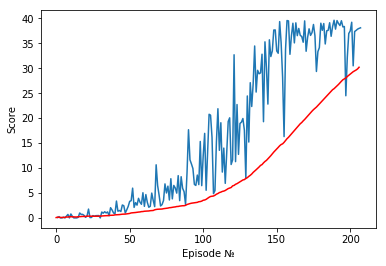

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label='DDPG')
plt.plot(np.arange(len(scores)), running_avg, c='r', label='Running AVG')
plt.ylabel('Score')
plt.xlabel('Episode №')
plt.show()

In [12]:
env.close()

### Future ideas

- Algorithm is very sensitive to hyperparameters. Furter tuning could lead to different results.
- Different weight initialization and different activation functions affect model performance. Leaky_Relu and Normal distribution prooved to be useless. Could try other(xavier_normal_, xavier_uniform_, kaiming_uniform_,kaiming_normal_).
- Algorithms other than DDPG could be used for solving the environment. Also could try to change Actor-Critic architecture, making a single Neural Net, which share input layers and first hidden layer and splitting after. 